In [1]:
from gutenberg.acquire import load_etext
from gutenberg.cleanup import strip_headers
import os, sys
from operator import add
from functools import reduce
from multiprocessing import Pool
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# Downloading books

In [2]:
'''i=0
while i<10000:
    i+=1
    try:
        text = strip_headers(load_etext(i)).strip()
        f = open((f'./data/book{i}.txt'), 'w')
        f.write(text)
    except:
        pass
'''

"i=0\nwhile i<10000:\n    i+=1\n    try:\n        text = strip_headers(load_etext(i)).strip()\n        f = open((f'./data/book{i}.txt'), 'w')\n        f.write(text)\n    except:\n        pass\n"

# Count the words

In [2]:
path = "./data/"
file_titles = []
dirs = os.listdir( path )


for file_name in dirs:
   file_titles.append(path + file_name)

In [4]:
def mapper(path):
    f = open(path, 'r')
    words = f.read()
    words.split()
    f.close()
    return len(words)


In [5]:
reducer = add

## MapReduce

In [6]:
%%time
reduce(reducer, map(mapper, file_titles))

Wall time: 36.3 s


1977894121

## MapReduce Multiprocessing

In [9]:
num_processes = 8

pool = Pool(num_processes)

In [10]:
%%time
mapped = pool.map(mapper, file_titles)
reduce(reducer, mapped)

# Histogram
## MapReduce

In [3]:
def mapper(path):
    word_dict = {}
    f = open(path, 'r')
    words = f.read()
    words = words.lower().split()
    f.close()
    return Counter(words)

In [4]:
reducer = add

In [5]:
%%time
word_count = reduce(reducer, map(mapper, file_titles))

Wall time: 12 ms


In [9]:
 word_count_top = word_count.most_common(50)

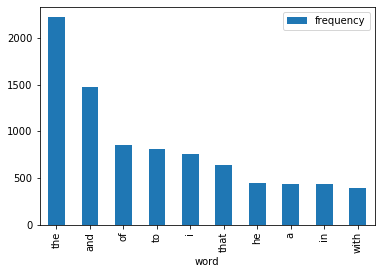

In [14]:
df = pd.DataFrame(word_count_top, columns=['word', 'frequency'])
df.plot(kind='bar', x='word')

## Multiprocessing MapReduce

In [ ]:
num_processes = 8

pool = Pool(num_processes)

In [ ]:
%%time
mapped = pool.map(mapper, file_titles)
word_count = reduce(reducer, mapped)

In [ ]:
 word_count_top = word_count.most_common(50)